# HealthBit Data Analyst Case

**Author**: Victor de Paula Silva

**Email**: victor.depaula@live.com / victordepaula24@gmail.com

## Introduction

1. Two databases are presented: one for beneficiary registration - cadastro_base (listing all beneficiaries in the health plan, with respective characteristics) and one for claims/utilizations of the plan - sinistros_base (each row is an event performed, with data such as procedure type, date of realization, etc.).
2. The two databases are linked by the beneficiary.
3. The beneficiaries are from a company in the industrial sector.
4. The databases are updated monthly. Both the beneficiary registration database and the utilization database mirror what happened in each reference month/year.

## Preparing Environment

### Auxiliary Libraries
To work with data, Python provides us with some very useful tools:

- Pandas: A library that works with reading, processing, and manipulating data, usually in a tabular or sequential form (lists or tables).
- Numpy: A library for scientific computing, it helps us manipulate vectors, matrices, and perform mathematical operations on data.
- Matplotlib: Matplotlib is a library that helps us create graphical visualizations of data.
- Seaborn: Seaborn is an additional layer for Matplotlib, allowing us to create more complex and beautiful graphics.
- Warnings: It is just a library for removing execution warnings (to avoid cluttering our study).
- Sys: The sys module provides access to some variables used or maintained by the Python interpreter, and functions that interact with the interpreter, such as accessing command line arguments.
- OS: The os module provides a portable way of using operating system dependent functionality, such as reading or writing to the file system, manipulating paths, and interacting with the system environment variables.

In [1]:
# Installing libraries
!pip install openpyxl

In [2]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sys
import os

In [3]:
# Python version
print(sys.version)

3.10.0 (tags/v3.10.0:b494f59, Oct  4 2021, 19:00:18) [MSC v.1929 64 bit (AMD64)]


### Settings

In [4]:
# Ignoring warnings
warnings.filterwarnings("ignore")

In [5]:
# Setting Matplotlib figure patterns
plt.rcParams['figure.figsize'] = (14, 6) # Size of the figures in inches
plt.rcParams['axes.titlepad'] = 26 # Title padding

In [6]:
# Setting Seaborn collor pallete
sns.set_palette("Accent") # Color palette
sns.set_style("whitegrid") # Graph style
sns.set(font_scale=1.5) # Setting the font size

In [7]:
# Setting numerical values on Pandas
pd.set_option('display.float_format', lambda x: '%.2f' % x) # Formatting to 1000000.00 for example

## Data Preparation & Cleaning

In [8]:
# Setting file path
file_path = r'C:\Users\Victor Paula\Documents\Personal\healthbit_data_analyst_case\Database'

# Listing files on path
files = os.listdir(file_path)
files

['cadastro_base.xlsx', 'sinistros_base.xlsx']

In [9]:
# Dictionary to store dataframes
dataframes = {}

# Iterate over each file
for file in files:
    # Extracting dataframe name for file name
    dataframe_name = file.split('.')[0]
    # Reading Excel file and creating dataframe
    dataframe = pd.read_excel(os.path.join(file_path, file))
    # Storing dataframe in dictionary
    dataframes[dataframe_name] = dataframe

In [10]:
# Importing files and creating dataframes
cadastro_base = dataframes['cadastro_base']
sinistros_base = dataframes['sinistros_base']

In [11]:
# Visualizing cadastro_base dataframe
cadastro_base.head()

,MÊS DE REFERÊNCIA,ANO DE REFERÊNCIA,CODIGO DA FAMILIA,CODIGO ÚNICO DA PESSOA,PLANO,TITULARIDADE,SEXO,IDADE,DATA DE NASCIMENTO,FAIXA ETÁRIA
0,5,2020,314,844,Básico,TITULAR,M,20,16/02/2000,19-23
1,5,2020,46,71,Básico,TITULAR,M,44,21/04/1976,44-48
2,5,2020,123,196,Básico,TITULAR,M,55,20/09/1964,54-58
3,5,2020,114,187,Básico,TITULAR,M,36,21/07/1983,34-38
4,5,2020,52,87,Básico,TITULAR,M,47,15/07/1972,44-48


In [12]:
# Dataframe cadastro_base format
cadastro_base.shape

(16736, 10)

In [13]:
# Dataframe cadastro_base columns
cadastro_base.columns

Index(['MÊS DE REFERÊNCIA', 'ANO DE REFERÊNCIA', 'CODIGO DA FAMILIA',
       'CODIGO ÚNICO DA PESSOA', 'PLANO', 'TITULARIDADE', 'SEXO', 'IDADE',
       'DATA DE NASCIMENTO', 'FAIXA ETÁRIA'],
      dtype='object')

In [14]:
# Informations of cadastro_base dataframe
cadastro_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16736 entries, 0 to 16735
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   MÊS DE REFERÊNCIA       16736 non-null  int64 
 1   ANO DE REFERÊNCIA       16736 non-null  int64 
 2   CODIGO DA FAMILIA       16736 non-null  int64 
 3   CODIGO ÚNICO DA PESSOA  16736 non-null  int64 
 4   PLANO                   16736 non-null  object
 5   TITULARIDADE            16736 non-null  object
 6   SEXO                    16736 non-null  object
 7   IDADE                   16736 non-null  int64 
 8   DATA DE NASCIMENTO      16736 non-null  object
 9   FAIXA ETÁRIA            16736 non-null  object
dtypes: int64(5), object(5)
memory usage: 1.3+ MB


In [15]:
# Visualizing sinistros_base dataframe
sinistros_base.head()

,DATA DE REFERENCIA,CODIGO DO EVENTO,FONTE,PLANO,TITULARIDADE,CODIGO DA FAMILIA,CODIGO ÚNICO DA PESSOA,DATA DO EVENTO,PRESTADOR,VALOR DO EVENTO,DESCRITOR DO EVENTO,INTERNACAO?
0,01-05-2020,10101012,REDE,Básico,DEPENDENTE,184,418,13/03/2020,256,64.02,CONSULTA MEDICA EM CONSULTORIO,Não
1,01-05-2020,10101012,REDE,Básico,DEPENDENTE,198,421,17/03/2020,256,65.20,CONSULTA MEDICA EM CONSULTORIO,Não
2,01-05-2020,10101012,REDE,Básico,TITULAR,199,502,13/03/2020,256,65.20,CONSULTA MEDICA EM CONSULTORIO,Não
3,01-05-2020,10101012,REDE,Básico,TITULAR,199,502,18/03/2020,256,65.20,CONSULTA MEDICA EM CONSULTORIO,Não
4,01-05-2020,10101012,REDE,Básico,TITULAR,199,502,08/04/2020,1332,103.00,CONSULTA MEDICA EM CONSULTORIO,Não


In [16]:
# Dataframe sinistros_base format
sinistros_base.shape

(48965, 12)

In [17]:
# Dataframe sinistros_base columns
sinistros_base.columns

Index(['DATA DE REFERENCIA', 'CODIGO DO EVENTO', 'FONTE', 'PLANO',
       'TITULARIDADE', 'CODIGO DA FAMILIA', 'CODIGO ÚNICO DA PESSOA',
       'DATA DO EVENTO', 'PRESTADOR', 'VALOR DO EVENTO', 'DESCRITOR DO EVENTO',
       'INTERNACAO?'],
      dtype='object')

In [18]:
# Informations of sinistros_base dataframe
sinistros_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48965 entries, 0 to 48964
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   DATA DE REFERENCIA      48965 non-null  object 
 1   CODIGO DO EVENTO        48965 non-null  int64  
 2   FONTE                   48965 non-null  object 
 3   PLANO                   48965 non-null  object 
 4   TITULARIDADE            48965 non-null  object 
 5   CODIGO DA FAMILIA       48965 non-null  int64  
 6   CODIGO ÚNICO DA PESSOA  48965 non-null  int64  
 7   DATA DO EVENTO          48965 non-null  object 
 8   PRESTADOR               48965 non-null  int64  
 9   VALOR DO EVENTO         48965 non-null  float64
 10  DESCRITOR DO EVENTO     48965 non-null  object 
 11  INTERNACAO?             48965 non-null  object 
dtypes: float64(1), int64(4), object(7)
memory usage: 4.5+ MB


In [19]:
# Filtering results with invalid dates
cadastro_base_invalid_dates = cadastro_base[cadastro_base['DATA DE NASCIMENTO'] == '00/00/0000']
cadastro_base_invalid_dates

,MÊS DE REFERÊNCIA,ANO DE REFERÊNCIA,CODIGO DA FAMILIA,CODIGO ÚNICO DA PESSOA,PLANO,TITULARIDADE,SEXO,IDADE,DATA DE NASCIMENTO,FAIXA ETÁRIA
960,5,2020,737,1800,Básico,DEPENDENTE,M,17,00/00/0000,0-18
962,5,2020,738,1802,Básico,TITULAR,M,26,00/00/0000,24-28
963,5,2020,639,1580,Básico,TITULAR,M,49,00/00/0000,49-53
965,5,2020,714,1752,Básico,TITULAR,F,20,00/00/0000,19-23
1249,5,2020,739,1803,Médio,TITULAR,M,49,00/00/0000,49-53
2681,6,2020,744,1813,Superior,DEPENDENTE,F,46,00/00/0000,44-48
5032,8,2020,737,1842,Básico,DEPENDENTE,F,45,00/00/0000,44-48
5038,8,2020,752,1843,Básico,TITULAR,M,33,00/00/0000,29-33
5042,8,2020,641,1585,Básico,TITULAR,M,34,00/00/0000,34-38
5043,8,2020,641,1844,Básico,DEPENDENTE,F,36,00/00/0000,34-38


In [20]:
# Extracting unique values from the 'CODIGO ÚNICO DA PESSOA' column
unique_beneficiary_code = cadastro_base_invalid_dates['CODIGO ÚNICO DA PESSOA'].unique()

# Filtering cadastro_base based on unique_beneficiary_code
cadastro_base[cadastro_base['CODIGO ÚNICO DA PESSOA'].isin(unique_beneficiary_code)].sort_values(by='CODIGO ÚNICO DA PESSOA')

,MÊS DE REFERÊNCIA,ANO DE REFERÊNCIA,CODIGO DA FAMILIA,CODIGO ÚNICO DA PESSOA,PLANO,TITULARIDADE,SEXO,IDADE,DATA DE NASCIMENTO,FAIXA ETÁRIA
963,5,2020,639,1580,Básico,TITULAR,M,49,00/00/0000,49-53
5042,8,2020,641,1585,Básico,TITULAR,M,34,00/00/0000,34-38
965,5,2020,714,1752,Básico,TITULAR,F,20,00/00/0000,19-23
960,5,2020,737,1800,Básico,DEPENDENTE,M,17,00/00/0000,0-18
962,5,2020,738,1802,Básico,TITULAR,M,26,00/00/0000,24-28
1249,5,2020,739,1803,Médio,TITULAR,M,49,00/00/0000,49-53
2681,6,2020,744,1813,Superior,DEPENDENTE,F,46,00/00/0000,44-48
5032,8,2020,737,1842,Básico,DEPENDENTE,F,45,00/00/0000,44-48
5038,8,2020,752,1843,Básico,TITULAR,M,33,00/00/0000,29-33
5043,8,2020,641,1844,Básico,DEPENDENTE,F,36,00/00/0000,34-38


In [21]:
# Transforming date columns in cadastro_base dataframe
date_column = 'DATA DE NASCIMENTO'

# Function to convert invalid dates to the first valid date
def convert_invalid_date(date_string):
    if date_string == "00/00/0000":
        return "01/01/1900"
    else:
        return date_string

# Applying pd.to_datetime with lambda function to handle invalid dates
cadastro_base[date_column] = cadastro_base[date_column].apply(lambda x: convert_invalid_date(x))

# Converting the date column to datetime format
cadastro_base[date_column] = pd.to_datetime(cadastro_base[date_column], format='%d/%m/%Y')

In [22]:
# Visualizing cadastro_base after transformation
cadastro_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16736 entries, 0 to 16735
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   MÊS DE REFERÊNCIA       16736 non-null  int64         
 1   ANO DE REFERÊNCIA       16736 non-null  int64         
 2   CODIGO DA FAMILIA       16736 non-null  int64         
 3   CODIGO ÚNICO DA PESSOA  16736 non-null  int64         
 4   PLANO                   16736 non-null  object        
 5   TITULARIDADE            16736 non-null  object        
 6   SEXO                    16736 non-null  object        
 7   IDADE                   16736 non-null  int64         
 8   DATA DE NASCIMENTO      16736 non-null  datetime64[ns]
 9   FAIXA ETÁRIA            16736 non-null  object        
dtypes: datetime64[ns](1), int64(5), object(4)
memory usage: 1.3+ MB


In [23]:
# Transforming date columns in sinistros_base dataframe
date_columns = ['DATA DE REFERENCIA', 'DATA DO EVENTO']
sinistros_base[date_columns] = sinistros_base[date_columns].apply(pd.to_datetime, format='mixed')

In [24]:
sinistros_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48965 entries, 0 to 48964
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   DATA DE REFERENCIA      48965 non-null  datetime64[ns]
 1   CODIGO DO EVENTO        48965 non-null  int64         
 2   FONTE                   48965 non-null  object        
 3   PLANO                   48965 non-null  object        
 4   TITULARIDADE            48965 non-null  object        
 5   CODIGO DA FAMILIA       48965 non-null  int64         
 6   CODIGO ÚNICO DA PESSOA  48965 non-null  int64         
 7   DATA DO EVENTO          48965 non-null  datetime64[ns]
 8   PRESTADOR               48965 non-null  int64         
 9   VALOR DO EVENTO         48965 non-null  float64       
 10  DESCRITOR DO EVENTO     48965 non-null  object        
 11  INTERNACAO?             48965 non-null  object        
dtypes: datetime64[ns](2), float64(1), int64(4), ob

### Preliminary information

- Both dataframes have all information complete, without missing values;
- Only the date columns need to be transformed, as they are not in datetime format, but the others are in the correct data type, either int, float, or object/string;
- `cadastro_base` has 12 records with invalid dates (00/00/0000) that needed to be treated, so the column could be converted to datetime. `sinistros_base` does not have the same problem.

## Exploratory Analysis & Visualization

In [25]:
# Number of unique beneficiaries
unique_beneficiaries = cadastro_base['CODIGO ÚNICO DA PESSOA'].nunique()
unique_beneficiaries

1679

In [26]:
# Visualizing clients with more than 1 age registered
multiple_ages = cadastro_base.groupby('CODIGO ÚNICO DA PESSOA')['IDADE'].nunique().loc[lambda x: x > 1].sort_values(ascending=False)
multiple_ages

CODIGO ÚNICO DA PESSOA
228     3
810     3
973     2
981     2
980     2
       ..
475     2
474     2
473     2
472     2
1650    2
Name: IDADE, Length: 1225, dtype: int64

In [27]:
# Describing cadastro_base dataframe
cadastro_base.describe()

,MÊS DE REFERÊNCIA,ANO DE REFERÊNCIA,CODIGO DA FAMILIA,CODIGO ÚNICO DA PESSOA,IDADE,DATA DE NASCIMENTO
count,16736.00,16736.00,16736.00,16736.00,16736.00,16736
mean,6.47,2020.34,273.84,756.09,27.96,1992-04-09 13:01:46.692160640
min,1.00,2020.00,1.00,1.00,0.00,1900-01-01 00:00:00
25%,3.00,2020.00,112.00,365.00,14.00,1980-06-30 00:00:00
50%,6.00,2020.00,243.00,727.00,30.00,1990-04-27 00:00:00
75%,10.00,2021.00,424.00,1140.00,40.00,2006-05-05 00:00:00
max,12.00,2021.00,754.00,1847.00,68.00,2021-04-26 00:00:00
std,3.47,0.47,184.53,455.02,15.94,NaN


Here, we can see that the `MÊS DE REFERÊNCIA` range from the first (January) to the last month (December), between the `ANO DE REFERÊNCIA` 2020 and 2021. We also have the `CODIGO DA FAMILIA` ranging from 1 to 754, and the `CODIGO ÚNICO DA PESSOA` ranging from 1 to 1847. 

In terms of `IDADE`, the minimum age ranges from 0 to 68 years. An age of 0 indicates that the beneficiary is a baby who has not yet turned 1 year old. The average age is ~28 years, with a standard deviation (variation) of ~16 years around the mean.

Thus, based on this dataset where `CODIGO ÚNICO DA PESSOA` can be duplicated based on the month and year of reference, we can see that 50% of the beneficiaries are up to 30 years old.

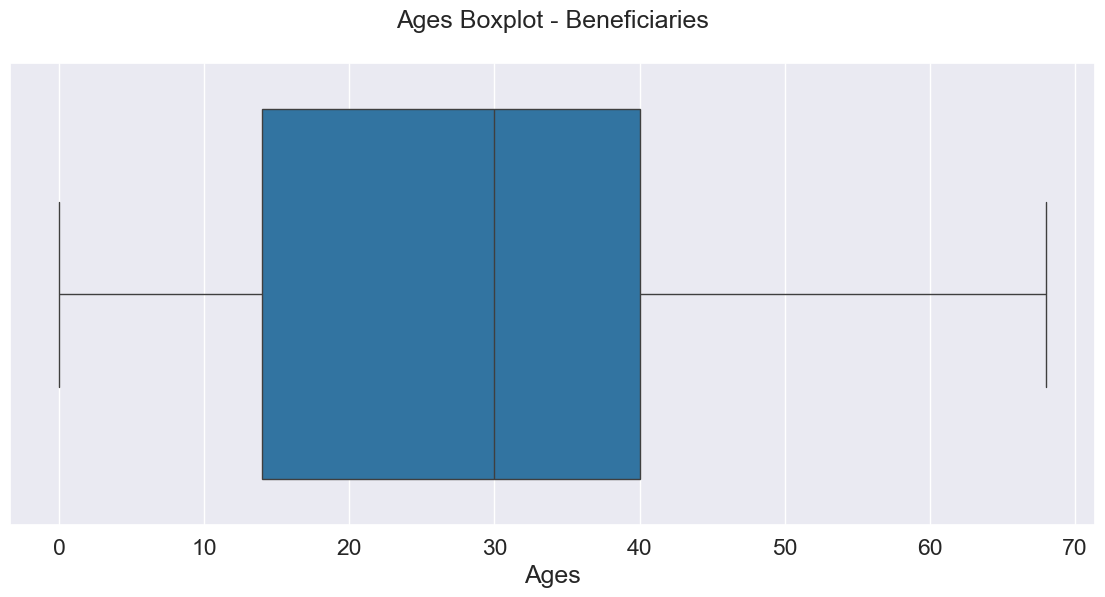

In [28]:
# Creating and visualizing ages boxplot
sns.boxplot(cadastro_base.IDADE, color='tab:blue', orient='h')
plt.xlabel('Ages')
plt.title('Ages Boxplot - Beneficiaries');

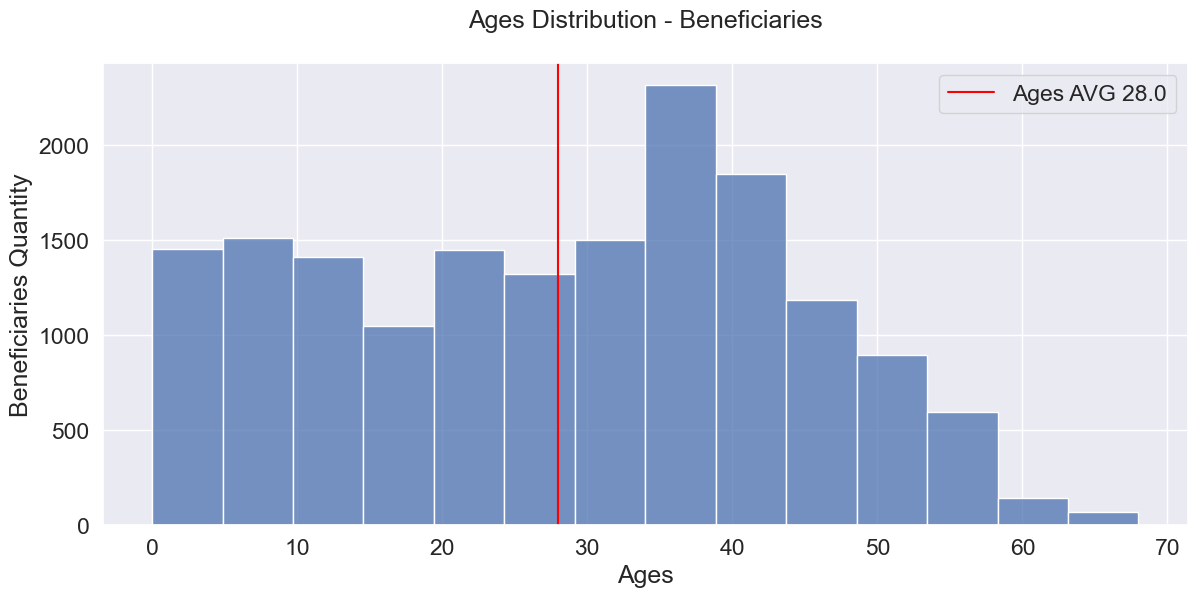

In [29]:
# Creating and visualizing ages histogram
ages_avg = cadastro_base.IDADE.mean()
sns.histplot(cadastro_base.IDADE, bins=14)

plt.axvline(ages_avg, c='red', label='Ages AVG {}'.format(round(ages_avg, 0)))
plt.ylabel('Beneficiaries Quantity')
plt.xlabel('Ages')
plt.title('Ages Distribution - Beneficiaries')
plt.legend();

In [30]:
cadastro_base

,MÊS DE REFERÊNCIA,ANO DE REFERÊNCIA,CODIGO DA FAMILIA,CODIGO ÚNICO DA PESSOA,PLANO,TITULARIDADE,SEXO,IDADE,DATA DE NASCIMENTO,FAIXA ETÁRIA
0,5,2020,314,844,Básico,TITULAR,M,20,2000-02-16,19-23
1,5,2020,46,71,Básico,TITULAR,M,44,1976-04-21,44-48
2,5,2020,123,196,Básico,TITULAR,M,55,1964-09-20,54-58
3,5,2020,114,187,Básico,TITULAR,M,36,1983-07-21,34-38
4,5,2020,52,87,Básico,TITULAR,M,47,1972-07-15,44-48
...,...,...,...,...,...,...,...,...,...,...
16731,4,2021,637,1576,Superior,DEPENDENTE,M,46,1975-02-09,44-48
16732,4,2021,637,1577,Superior,DEPENDENTE,F,3,2017-04-15,0-18
16733,4,2021,637,1575,Superior,TITULAR,F,41,1979-10-13,39-43
16734,4,2021,696,1697,Superior,TITULAR,M,34,1986-10-01,34-38


In [31]:
cadastro_base.columns

Index(['MÊS DE REFERÊNCIA', 'ANO DE REFERÊNCIA', 'CODIGO DA FAMILIA',
       'CODIGO ÚNICO DA PESSOA', 'PLANO', 'TITULARIDADE', 'SEXO', 'IDADE',
       'DATA DE NASCIMENTO', 'FAIXA ETÁRIA'],
      dtype='object')

In [32]:
# Visualizing the total number of unique beneficiaries by gender
cadastro_base.groupby('SEXO')['CODIGO ÚNICO DA PESSOA'].nunique()

SEXO
F    787
M    892
Name: CODIGO ÚNICO DA PESSOA, dtype: int64

In [33]:
# Visualizing the percentual of total by gender
percentage_by_gender = (cadastro_base.groupby('SEXO')['CODIGO ÚNICO DA PESSOA'].nunique() / cadastro_base['CODIGO ÚNICO DA PESSOA'].nunique()) * 100
percentage_by_gender

SEXO
F   46.87
M   53.13
Name: CODIGO ÚNICO DA PESSOA, dtype: float64

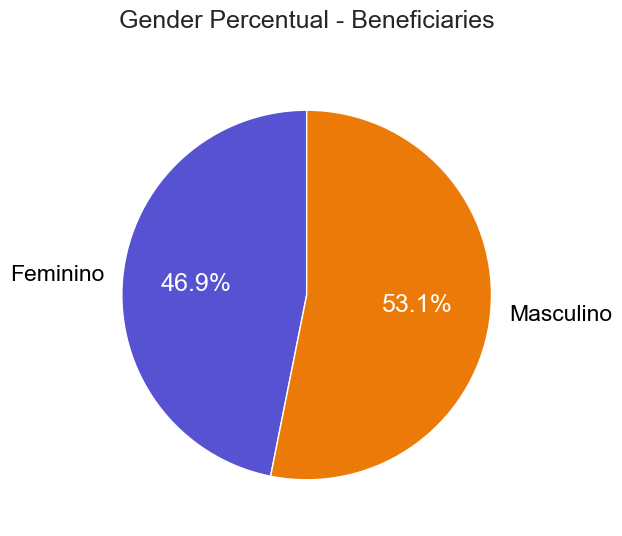

In [34]:
# Creating and visualizing gender distribution
_, ax = plt.subplots()

patches, texts, autotexts = ax.pie(
    percentage_by_gender, 
    colors = ['#5752D1', '#EC7A08'], 
    labels=['Feminino', 'Masculino'], 
    autopct='%1.1f%%', 
    startangle=90
)
for text in texts:
    text.set_color('black')
for autotext in autotexts:
    autotext.set_color('white')
    
plt.title('Gender Percentual - Beneficiaries');

We have more male individuals in the dataset, representing 53% of the total, while the female population represents 47% of the dataset, looking at the column CODIGO `ÚNICO DA PESSOA` distinctly.

In [35]:
# Visualizing clients with more than 1 plan
multiple_plans = cadastro_base.groupby('CODIGO ÚNICO DA PESSOA')['PLANO'].nunique().loc[lambda x: x > 1].sort_values(ascending=False)
multiple_plans

Series([], Name: PLANO, dtype: int64)

There are no beneficiaries with more than one plan over time. In other words, all beneficiaries have only one plan.

In [36]:
# Visualizing the total number of unique beneficiaries by plan
cadastro_base.groupby('PLANO')['CODIGO ÚNICO DA PESSOA'].nunique()

PLANO
Básico      1163
Médio        392
Superior     124
Name: CODIGO ÚNICO DA PESSOA, dtype: int64

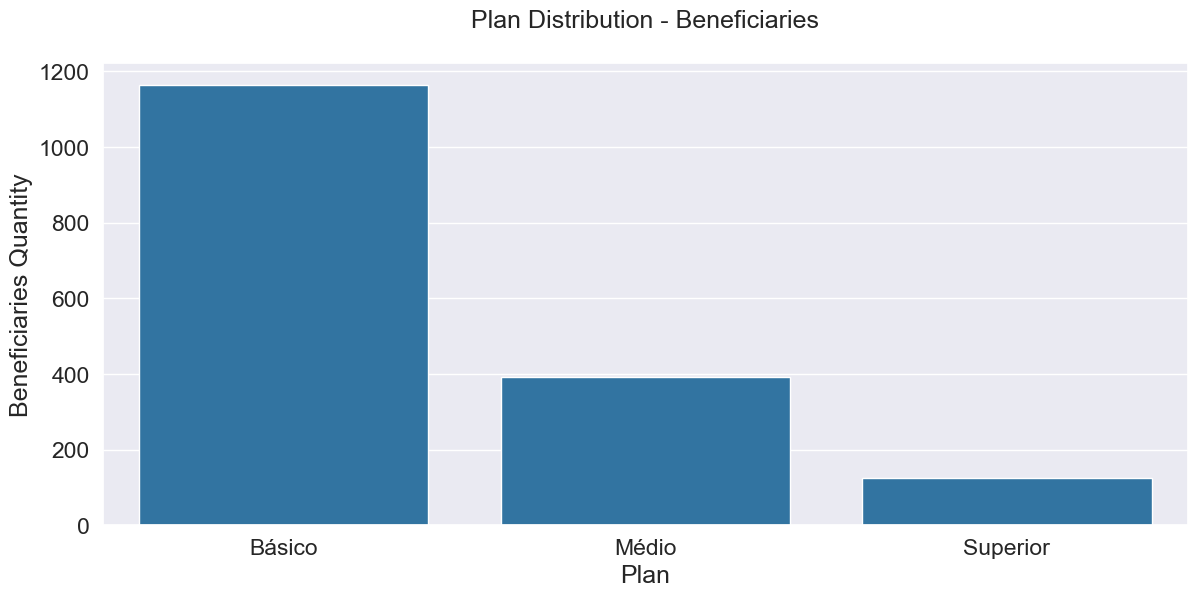

In [37]:
sns.barplot(x=cadastro_base.groupby('PLANO')['CODIGO ÚNICO DA PESSOA'].nunique().index, 
            y=cadastro_base.groupby('PLANO')['CODIGO ÚNICO DA PESSOA'].nunique().values, 
            color='tab:blue')
plt.xlabel('Plan')
plt.ylabel('Beneficiaries Quantity')
plt.title('Plan Distribution - Beneficiaries');

69% of unique beneficiaries have the 'Básico' `PLANO`, representing 69% of the total. On the other hand, only 7% of the plans are 'Superior', which is just over 9 times smaller than the total number of 'Básico' plans. This indicates a significant concentration of lower-value plans in this company.

In [38]:
# Visualizing the total number of unique beneficiaries by titularity
cadastro_base.groupby('TITULARIDADE')['CODIGO ÚNICO DA PESSOA'].nunique()

TITULARIDADE
DEPENDENTE    992
TITULAR       687
Name: CODIGO ÚNICO DA PESSOA, dtype: int64

In [39]:
# Visualizing the percentual of total by titularity
percentage_by_titularity = (cadastro_base.groupby('TITULARIDADE')['CODIGO ÚNICO DA PESSOA'].nunique() / cadastro_base['CODIGO ÚNICO DA PESSOA'].nunique()) * 100
percentage_by_titularity

TITULARIDADE
DEPENDENTE   59.08
TITULAR      40.92
Name: CODIGO ÚNICO DA PESSOA, dtype: float64

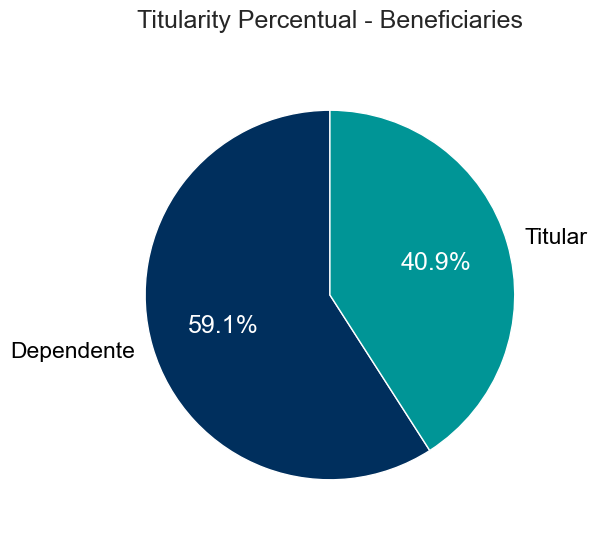

In [40]:
# Creating and visualizing titularity distribution
_, ax = plt.subplots()

patches, texts, autotexts = ax.pie(
    percentage_by_titularity, 
    colors = ['#002F5D', '#009596'], 
    labels=['Dependente', 'Titular'], 
    autopct='%1.1f%%', 
    startangle=90
)
for text in texts:
    text.set_color('black')
for autotext in autotexts:
    autotext.set_color('white')
    
plt.title('Titularity Percentual - Beneficiaries');

The majority of beneficiaries are dependents, representing 59% of the total when we look at the `TITULARIDADE` column. This indicates that, overall, a policyholder brings at least one dependent, but there are many cases where this number is even higher, as the policyholder can add their spouse and also a child, for example.

In [41]:
# Grouping by 'CODIGO ÚNICO DA PESSOA' and counting unique 'DATA DE NASCIMENTO'
duplicates = cadastro_base.groupby('CODIGO ÚNICO DA PESSOA')['DATA DE NASCIMENTO'].nunique()

# Filtering for duplicates
duplicates = duplicates[duplicates > 1]

# Displaying the results
print(duplicates)


CODIGO ÚNICO DA PESSOA
1388    2
Name: DATA DE NASCIMENTO, dtype: int64


In [42]:
# Visualizing clients with more than date of birth
multiple_bithdate = cadastro_base.groupby('CODIGO ÚNICO DA PESSOA')['DATA DE NASCIMENTO'].nunique().loc[lambda x: x > 1].sort_values(ascending=False)
multiple_bithdate

CODIGO ÚNICO DA PESSOA
1388    2
Name: DATA DE NASCIMENTO, dtype: int64

In [43]:
cadastro_base

,MÊS DE REFERÊNCIA,ANO DE REFERÊNCIA,CODIGO DA FAMILIA,CODIGO ÚNICO DA PESSOA,PLANO,TITULARIDADE,SEXO,IDADE,DATA DE NASCIMENTO,FAIXA ETÁRIA
0,5,2020,314,844,Básico,TITULAR,M,20,2000-02-16,19-23
1,5,2020,46,71,Básico,TITULAR,M,44,1976-04-21,44-48
2,5,2020,123,196,Básico,TITULAR,M,55,1964-09-20,54-58
3,5,2020,114,187,Básico,TITULAR,M,36,1983-07-21,34-38
4,5,2020,52,87,Básico,TITULAR,M,47,1972-07-15,44-48
...,...,...,...,...,...,...,...,...,...,...
16731,4,2021,637,1576,Superior,DEPENDENTE,M,46,1975-02-09,44-48
16732,4,2021,637,1577,Superior,DEPENDENTE,F,3,2017-04-15,0-18
16733,4,2021,637,1575,Superior,TITULAR,F,41,1979-10-13,39-43
16734,4,2021,696,1697,Superior,TITULAR,M,34,1986-10-01,34-38


## Questions & Answers (Q&A)

### Questions
`cadastro_base`
1. Does the dataframe have any beneficiary with inconsistent registration?
2. Does this dataframe have any beneficiaries with different plans over the reference months? Does the titularity change over the months?
3. Any beneficiary with a different date of birth? More than one date for the same beneficiary.
4. How is the distribution of beneficiaries among sex, plans, and titularity?
5. Can the same beneficiary have more than one age over time? Due to the base being a monthly record (position date).

### Answers
`cadastro_base`
1. Yes, 12 beneficiaries have an invalid date of birth, with inconsistent dates. None of them were corrected in subsequent reference months, thus maintaining only the incorrect results.
2. No, all beneficiaries continue with the same plan over the months. The same occurs with the titularity, remaining the same.
3. Yes, the `CODIGO ÚNICO DA PESSOA` = 1388 has two dates of birth: 12/04/1986 until January/2021 and 11/04/1986 from February/2021 onwards.
4. The male gender has the highest number of beneficiaries, as well as the Superior plan in the plan group, while Dependents are the highest number of beneficiaries among the types of titularity.
5. Yes, there are cases where the same beneficiary has 2 or 3 ages, for example.

## Exporting transformed dataframes

In [44]:
# Converting the 'MÊS DE REFERÊNCIA' and 'ANO DE REFERÊNCIA' columns to date format
cadastro_base['REFERENCE_DATE'] = pd.to_datetime(cadastro_base['ANO DE REFERÊNCIA'].astype(str) + '-' + cadastro_base['MÊS DE REFERÊNCIA'].astype(str), format='%Y-%m')

# Getting the index of the last record for each 'CODIGO ÚNICO DA PESSOA'
last_index = cadastro_base.groupby('CODIGO ÚNICO DA PESSOA')['REFERENCE_DATE'].idxmax()

# Selecting the records corresponding to the indices
beneficiaries = cadastro_base.loc[last_index].reset_index(drop=True)

In [47]:
# Exporting beneficiaries from cadastro_base
beneficiaries.to_excel('beneficiaries.xlsx')

## Summary & Conclusion

`cadastro_base`

Based on the EDA conducted, it was noted that some treatments were necessary in the `cadastro_base` dataframe, as it is a base with the position date of the registration updates for each client.

To have unique results for each client (`CODIGO ÚNICO DA PESSOA`), I chose to bring the last record for each client, avoiding problems with duplicate *dates* and *ages*, as was the case before. Additionally, I treated the `DATA DE NASCIMENTO` column to correct the issue found with the 12 invalid records.

As a result, I generated a new treated dataframe named `beneficiaries`, with these unique results coming from `cadastro_base`.